## Reto 2: Gráficas de barras

### 1. Objetivos:
    - Aprender a hacer gráficas de barras de distintos tipos
 
---
    
### 2. Desarrollo:

Para este ejercicio vamos a utilizar el dataset 'melbourne_housing-clean.csv'. La fuente original [está aquí](https://www.kaggle.com/anthonypino/melbourne-housing-market), en caso de que quieras recordar de qué trata.

Vamos a realizar 3 gráficas de barras utilizando este dataset. Las instrucciones para cada una son las siguientes:

1. Gráfica de barras *verticales* usando la columna `rooms`. El eje y será el *conteo de frecuencia* de cada categoría. Las barras tienen que quedar *ordenadas en orden descendente* (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar [la documentación](https://seaborn.pydata.org/generated/seaborn.barplot.html) de la gráfica de barras de Seaborn.

2. Gráfica de barras *verticales* de la columna `types`. El eje y será el *porcentaje de frecuencia* de cada categoría.

3. Gráfica de barras *h*orizontales* de la columna `council_area`. El eje x será el *conteo de frecuencia* de cada categoría.

**Todas** las gráficas deberán de tener títulos y nombres adecuados para los ejes. También deberán de tener el tamaño correcto para que la visualización sea comprensible.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv',index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df['rooms'].unique()

array([2, 3, 4, 1, 6, 5, 8, 7])

In [35]:
df['rooms'] = df['rooms'].astype('category')

Text(0.5, 1.0, 'Número de Cuartos por Vivienda')

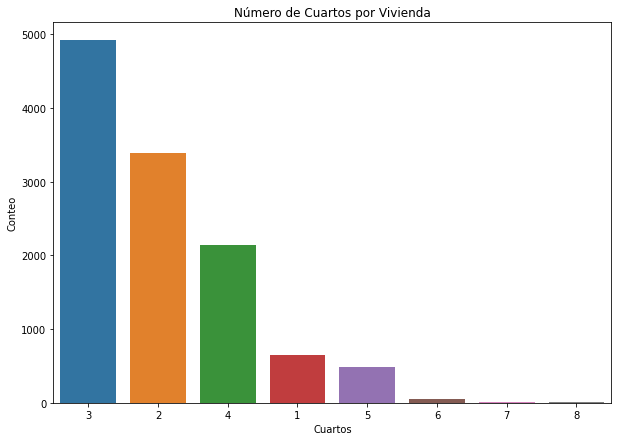

In [63]:
counts = df['rooms'].value_counts()
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=counts.index, y=counts, order=counts.index)
plt.xlabel('Cuartos')
plt.ylabel('Conteo')
plt.title('Número de Cuartos por Vivienda')

In [13]:
df['rooms'].value_counts().sort_values(ascending=False)

3    4916
2    3389
4    2146
1     645
5     479
6      55
7       9
8       7
Name: rooms, dtype: int64

In [37]:
df['type'] = df['type'].astype('category')

In [38]:
counts2 = df['type'].value_counts()

In [39]:
percentages = counts2 * 100 / counts2.sum()
percentages

h    66.649493
u    24.549201
t     8.801305
Name: type, dtype: float64

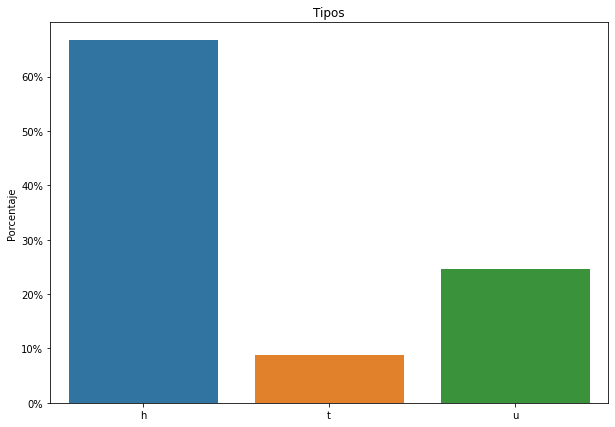

In [62]:
import matplotlib.ticker
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x=percentages.index, y=percentages, orient='v')
ax.set(title='Tipos', ylabel='Porcentaje')
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

In [44]:
df['council_area'] = df['council_area'].astype('category')

In [47]:
counts3 = df['council_area'].value_counts()
counts3

Moreland             1129
Boroondara           1128
Moonee Valley         961
Darebin               895
Glen Eira             831
Stonnington           710
Maribyrnong           675
Yarra                 644
Port Phillip          622
Banyule               557
Bayside               473
Melbourne             463
Hobsons Bay           418
Brimbank              392
Monash                313
Manningham            300
Whitehorse            290
Kingston              177
Hume                  128
Whittlesea            122
Wyndham                68
Knox                   65
Maroondah              62
Melton                 49
Greater Dandenong      47
Frankston              39
Casey                  31
Nillumbik              26
Yarra Ranges           16
Cardinia                6
Macedon Ranges          6
Moorabool               2
Mitchell                1
Name: council_area, dtype: int64

Text(0.5, 42.0, 'Conteo')

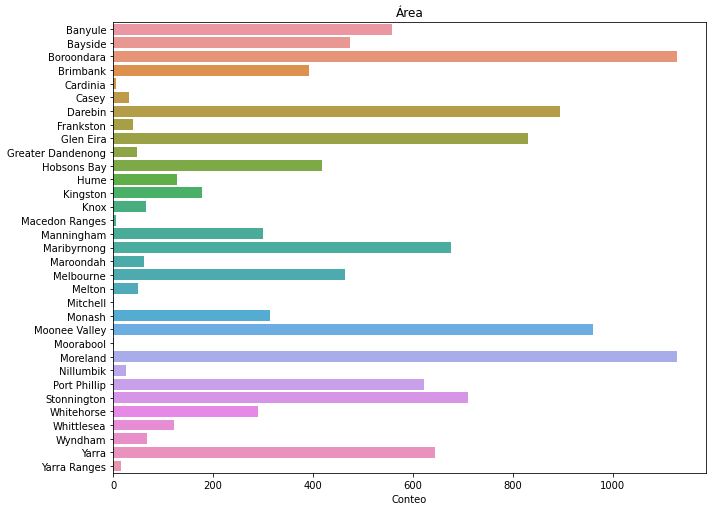

In [60]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(y=counts3.index, x=counts3, orient='h')
plt.tight_layout()
plt.title('Área')
plt.xlabel('Conteo')